# Overall Stargal Stats

Preliminary work for star-gal separation. Performs statistics on lephare outputs carried on two synthetic magnitude libraries (one composed of star SED, another of galaxies SEDs).

SPLIT add two columns to LePHARE:
 - pdz_flag: describes the quality of the computed redshift
 - s-type: the most likely type of star (OBAFGKM) if the observed source was a star


In [1]:
### Libraries ###
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from lephare import statsplot as lsp; reload(lsp)
# %matplotlib widget
%matplotlib inline

LEPHAREDIR is being set to the default cache directory:
/home/hallouin/.cache/lephare/data
More than 1Gb may be written there.
LEPHAREWORK is being set to the default cache directory:
/home/hallouin/.cache/lephare/work
Default work cache is already linked. 
This is linked to the run directory:
/home/hallouin/.cache/lephare/runs/20251013T115331


## Tests on DES stars

In [81]:
### Generate pandas df from output catalog ###
base_dir = os.path.abspath(os.path.join(os.getcwd(), '../..')) #change to your lephare base_dir
# CAT_OUT = os.path.join(base_dir, 'training_stats/simulation_catalogs/star_gal/DESstars_Buzzard_PICKLES_DES.out')
CAT_OUT = os.path.join(base_dir, 'training_stats/simulation_catalogs/DES/DES_STARCAT/WORK_COMPLETE2/zphota/DESstars_Buzzard_BT_DES.out')
photoz_des = lsp.lephare_to_pandas(CAT_OUT)
### Clean error values
# photoz_des = photoz_des[photoz_des['Z_BEST'] != -99.9]
print(list(photoz_des.columns.values))
# photoz_des = photoz_des[photoz_des['Z_BEST']>0] #here we do not delete the Z_BEST=-99.9 values because of the presence of stars.

['IDENT', 'Z_BEST', 'Z_MED', 'Z_MODE', 'CHI_BEST', 'MOD_BEST', 'SCALE_BEST', 'NBAND_USED', 'Z_SEC', 'CHI_SEC', 'MOD_STAR', 'CHI_STAR', 'MAG_OBS0', 'MAG_OBS1', 'MAG_OBS2', 'MAG_OBS3', 'MAG_OBS4', 'ERR_MAG_OBS0', 'ERR_MAG_OBS1', 'ERR_MAG_OBS2', 'ERR_MAG_OBS3', 'ERR_MAG_OBS4', 'ZSPEC']


In [82]:
### error observed mag bining
photoz_des_errmag001 = photoz_des[photoz_des['ERR_MAG_OBS1']<0.002]
photoz_des_errmag002 = photoz_des[(photoz_des['ERR_MAG_OBS1']>=0.002) & (photoz_des['ERR_MAG_OBS1']<0.003)]
photoz_des_errmag003 = photoz_des[(photoz_des['ERR_MAG_OBS1']>=0.003) & (photoz_des['ERR_MAG_OBS1']<=0.1)]
photoz_des_errmag1 = photoz_des[(photoz_des['ERR_MAG_OBS1']>0.1)]

### observed mag bining
photoz_des_mag20 = photoz_des[photoz_des['MAG_OBS1']<20]
photoz_des_mag21 = photoz_des[(photoz_des['MAG_OBS1']>=20) & (photoz_des['MAG_OBS1']<21)]
photoz_des_mag22 = photoz_des[(photoz_des['MAG_OBS1']>=21)]


In [83]:
photoz_des_magbin = (photoz_des_mag20, photoz_des_mag21, photoz_des_mag22)
photoz_des_magbin_labels = ['Rmag < 20', 'Rmag < 21', 'Rmag > 21']
photoz_des_emagbin = (photoz_des_errmag001, photoz_des_errmag002, photoz_des_errmag003,photoz_des_errmag1)
photoz_des_emagbin_labels = ['Remag < 0.002', 'Remag < 0.003', 'Remag > 0.003', 'Remag > 0.1']

z_plot

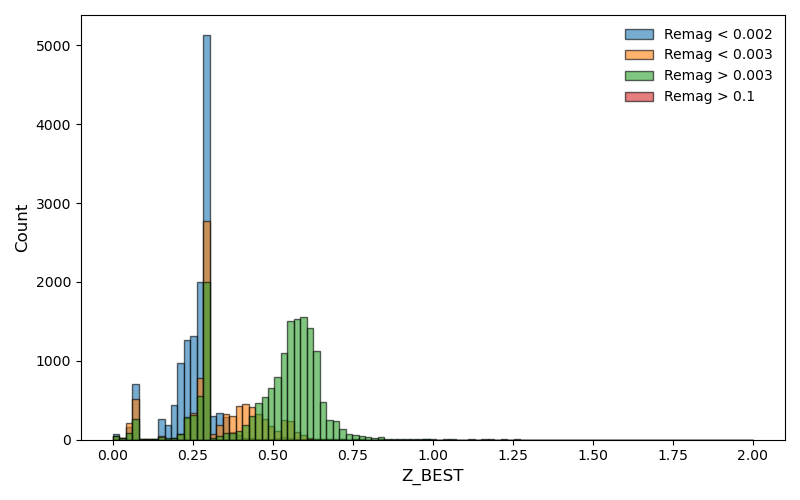

In [84]:
#Plot z hist
# %matplotlib widget
lsp.histograms(photoz_des_emagbin, xrange=(0,2), labels=photoz_des_emagbin_labels)

Chi2 distribution, pit and qq-plot

/home/hallouin/Documents/t_hall/lephare/src/lephare/statsplot.py:474: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


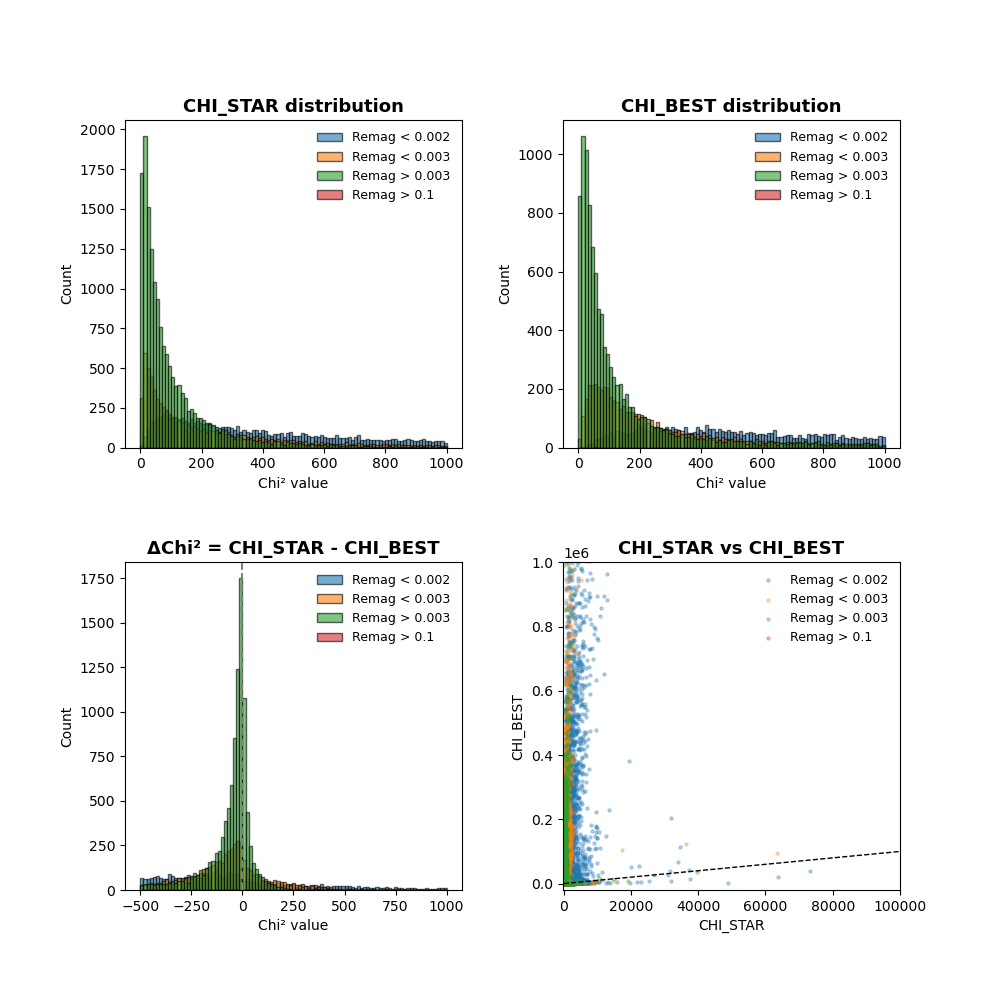

In [ ]:
# %matplotlib widget

lsp.chi_stats(data = photoz_des_emagbin, mask_min=-500, mask_max=1000, bins=100,
             scatter_xlim=(-200, 1e5), scatter_ylim=(-20000, 1e6), labels=photoz_des_emagbin_labels)

/home/hallouin/Documents/t_hall/lephare/src/lephare/statsplot.py:209: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_scatter.legend(fontsize='small', loc='upper left', frameon=False)


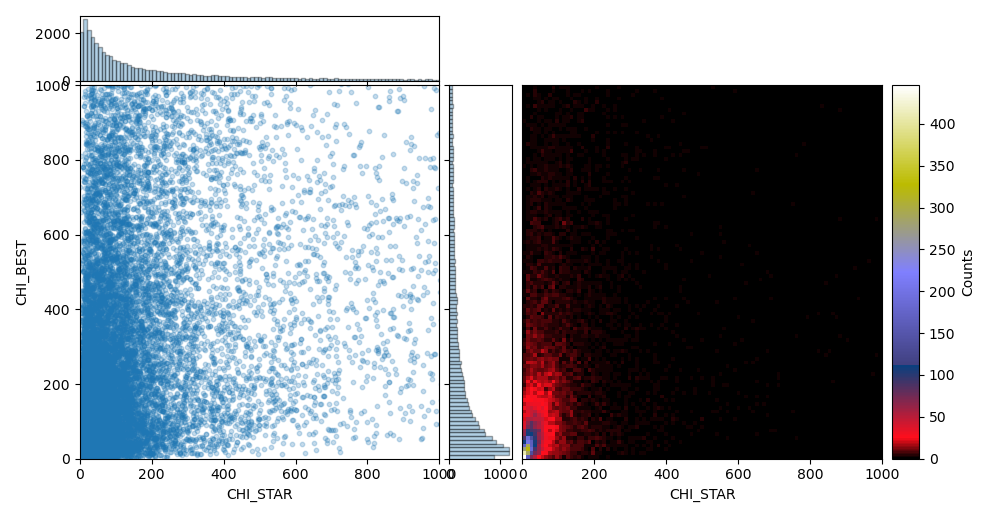

In [87]:

lsp.scatter_vs_hist2D(data=photoz_des, cmaps='gist_stern', deltaz=None, y_col='CHI_BEST', x_col='CHI_STAR', xrange=(0,1000), yrange=(0,1000), dline=False)

$\Delta\chi$ analysis

In [68]:
delta = photoz_des['CHI_STAR']-photoz_des['CHI_BEST']
delta = delta[photoz_des['Z_BEST']>=0]
print(len(delta))

39151


In [69]:
print("n(Delta>0) / n = ", len(delta[delta>0])/len(delta))

n(Delta>0) / n =  0.14962580776991646


flag VS stype

NameError: name 'zphota' is not defined

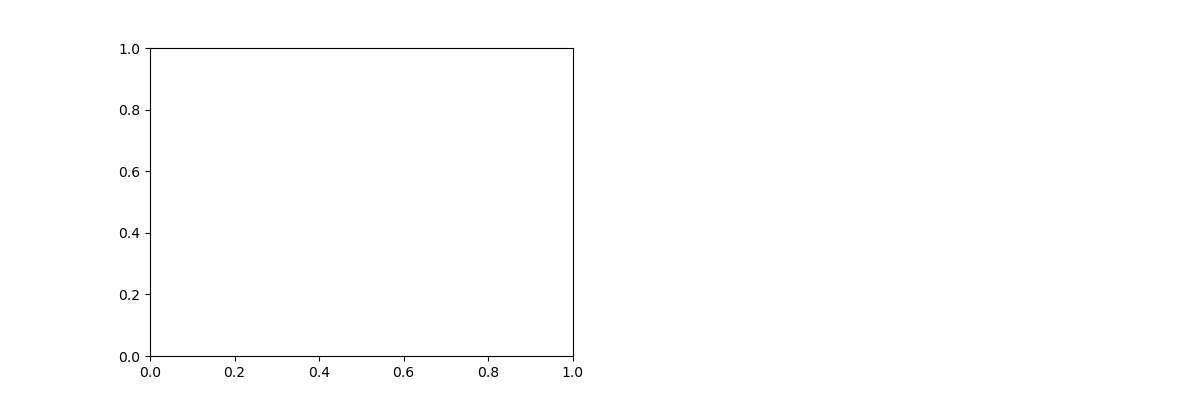

In [43]:
###Flag and type distribution

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(zphota["PDZ_FLAG"][zphota["PDZ_FLAG"]>=0], bins=100, alpha=0.7, edgecolor='black')#, density=True)#, log=True)
plt.title("PDZ flag distribution")
plt.subplot(122)
plt.title("S-type distribution")
plt.hist(zphota["S_TYPE"], bins=100, alpha=0.7, edgecolor='black', color='orange')#, density=True)#, log=True)

# plt.ylim(0,0.010)
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
plt.rcParams.update({'font.size': 6})
contingency = pd.crosstab(zphota["S_TYPE"], zphota["PDZ_FLAG"])

# Plot avec seaborn
plt.figure(figsize=(18,16))
sns.heatmap(contingency, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 6.5})
plt.title("Distribution des flags par type d'étoile")
plt.ylabel("Type d'étoile")
plt.xlabel("Flag")
plt.show()


In [ ]:
plt.figure(figsize=(15,13))

sns.stripplot(x=zphota["CHI_STAR"]-zphota["CHI_BEST"], y=zphota["S_TYPE"], jitter=True, size=6)
plt.title("DeltaChi distribution as a function of source-type")
plt.ylabel("Type d'étoile")
plt.xlabel("Delta Chi =  Chi_star - Chi_best")
plt.xlim(-1e4,1e4)
plt.show()

In [ ]:
###Flag and type distribution

plt.figure(figsize=(4, 4))
mask=(zphota["CHI_STAR"]<1e4) & (zphota["CHI_BEST"]<1e4)
plt.hist(zphota["CHI_STAR"] - zphota["CHI_BEST"], bins=1000000, alpha=0.7, edgecolor='black')#, density=True)#, log=True)
plt.title("Delta Chi dist")


# plt.ylim(0,0.010)
plt.legend()
plt.show()